# Presentación Final Visualización de Datos

Carlos Ortiz Montes de Oca
A01382584

“World Happiness Report”

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity.

https://worldhappiness.report
https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

Preguntas que me voy a hacer...

Paso a paso lo que voy a hacer...

# Limpiando la base de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

datab = pd.read_csv('datasets/world-happiness-report.csv')

In [2]:
datab.head(13)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [3]:
datab.drop(['Log GDP per capita','Freedom to make life choices','Generosity','Positive affect','Negative affect'],
          axis=1,
          inplace=True)

In [4]:
datab.rename(columns={'Life Ladder' : 'Happiness',
                     'Social support' : 'Support',
                     'Healthy life expectancy at birth' : 'LExpectancy',
                     'Perceptions of corruption' : 'Corruption'},
            inplace = True)

In [5]:
datab.columns

Index(['Country name', 'year', 'Happiness', 'Support', 'LExpectancy',
       'Corruption'],
      dtype='object')

In [6]:
datab.head(13)

,Country name,year,Happiness,Support,LExpectancy,Corruption
0,Afghanistan,2008,3.724,0.451,50.80,0.882
1,Afghanistan,2009,4.402,0.552,51.20,0.850
2,Afghanistan,2010,4.758,0.539,51.60,0.707
3,Afghanistan,2011,3.832,0.521,51.92,0.731
4,Afghanistan,2012,3.783,0.521,52.24,0.776
5,Afghanistan,2013,3.572,0.484,52.56,0.823
6,Afghanistan,2014,3.131,0.526,52.88,0.871
7,Afghanistan,2015,3.983,0.529,53.20,0.881
8,Afghanistan,2016,4.220,0.559,53.00,0.793
9,Afghanistan,2017,2.662,0.491,52.80,0.954


In [7]:
datab.describe()

,year,Happiness,Support,LExpectancy,Corruption
count,1949.000000,1949.000000,1936.000000,1894.000000,1839.000000
mean,2013.216008,5.466705,0.812552,63.359374,0.747125
std,4.166828,1.115711,0.118482,7.510245,0.186789
min,2005.000000,2.375000,0.290000,32.300000,0.035000
25%,2010.000000,4.640000,0.749750,58.685000,0.690000
50%,2013.000000,5.386000,0.835500,65.200000,0.802000
75%,2017.000000,6.283000,0.905000,68.590000,0.872000
max,2020.000000,8.019000,0.987000,77.100000,0.983000


# ¿Qué tanto afectan las variables seleccionadas en la felicidad de las personas?

Descripciones de correlación, etc




In [8]:
regresion = sm.OLS.from_formula('Happiness ~ Support + LExpectancy + Corruption', data=datab)
resultado = regresion.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1419.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:09:32   Log-Likelihood:                -1665.6
No. Observations:                1778   AIC:                             3339.
Df Residuals:                    1774   BIC:                             3361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6923      0.163     -4.241      0.000      -1.012      -0.372
Support         3.6737      0.154     23.878      0.000       3.372       3.975
LExpectancy     0.0655      0.003     25.962      0.000       0.061       0.070
Corruption     -1.3042      0.084    -15.611      0.000      -1.468      -1.140
==============================================================================
Omnibus:                       14.153   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.498
Skew:                          -0.167   Prob(JB):                     0.000431
Kurtosis:                       3.313   Cond. No.                         783.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

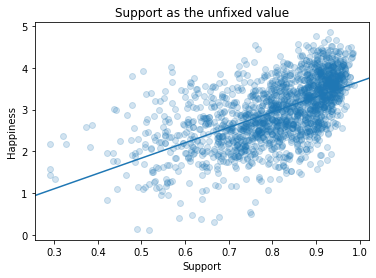

In [9]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot1 = plt.axes()
plot_ccpr(resultado, "Support", plot1)
_ = plot1.lines[0].set_alpha(0.2)
_ = plot1.set_ylabel("Happiness")
_ = plot1.set_title('Support as the unfixed value')

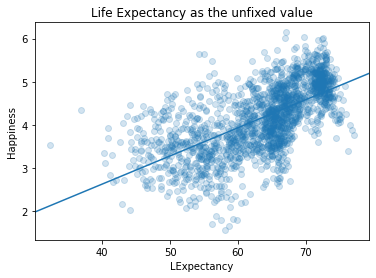

In [10]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot2 = plt.axes()
plot_ccpr(resultado, "LExpectancy", plot2)
_ = plot2.lines[0].set_alpha(0.2)
_ = plot2.set_ylabel("Happiness")
_ = plot2.set_title('Life Expectancy as the unfixed value')

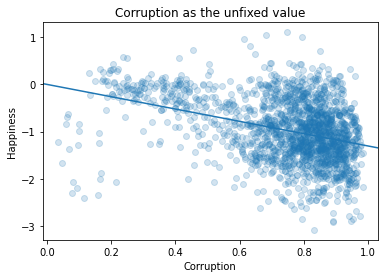

In [11]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot3 = plt.axes()
plot_ccpr(resultado, "Corruption", plot3)
_ = plot3.lines[0].set_alpha(0.2)
_ = plot3.set_ylabel("Happiness")
_ = plot3.set_title('Corruption as the unfixed value')

# Ranking de felicidad a través de los años 

Descripción de grafico de barras, etc



In [12]:
datab.head(13)

,Country name,year,Happiness,Support,LExpectancy,Corruption
0,Afghanistan,2008,3.724,0.451,50.80,0.882
1,Afghanistan,2009,4.402,0.552,51.20,0.850
2,Afghanistan,2010,4.758,0.539,51.60,0.707
3,Afghanistan,2011,3.832,0.521,51.92,0.731
4,Afghanistan,2012,3.783,0.521,52.24,0.776
5,Afghanistan,2013,3.572,0.484,52.56,0.823
6,Afghanistan,2014,3.131,0.526,52.88,0.871
7,Afghanistan,2015,3.983,0.529,53.20,0.881
8,Afghanistan,2016,4.220,0.559,53.00,0.793
9,Afghanistan,2017,2.662,0.491,52.80,0.954


In [13]:
datab.drop(['year'],
          axis=1,
          inplace=True)

In [14]:
datab_exper = datab.groupby('Country name', 
                           axis=0).mean()

print(type(datab.groupby('Country name', 
                      axis=0
                     )))

datab_exper.sort_values(['Happiness'],
                       ascending=False,
                       axis=0,
                       inplace=True
                       )

datab_exper.head(15)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Happiness,Support,LExpectancy,Corruption
Country name,,,,
Denmark,7.680400,0.957133,71.169333,0.200467
Finland,7.597154,0.949000,71.180000,0.249000
Switzerland,7.548300,0.943600,73.334000,0.305900
Norway,7.512400,0.950500,72.670000,0.344200
Netherlands,7.466286,0.933500,71.707143,0.414929
Iceland,7.446500,0.977500,72.865000,0.701000
Canada,7.376333,0.935571,72.694667,0.417867
Sweden,7.369467,0.927933,72.110667,0.262714
New Zealand,7.310286,0.952929,72.428571,0.266214


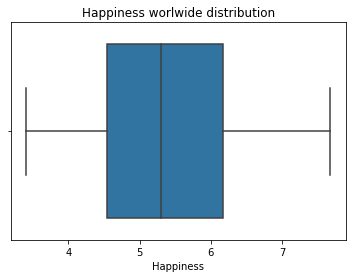

In [15]:
sns.boxplot(x = datab_exper["Happiness"]).set_title("Happiness worlwide distribution")
plt.show()